In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym

In [2]:
env = gym.make('FrozenLake-v1', is_slippery=False)

In [3]:
nS = env.observation_space.n
nA = env.action_space.n

In [66]:
gamma = 0.9

In [67]:
max_episodes = 1000
max_steps = 20

In [68]:
def calculate_returns(buffer, Rs):
    R = 0
    for s, a, r in reversed(buffer):
        R = r + gamma*R
        Rs[s, a] += R
    return Rs

In [77]:
def mc_estimation(Q):
    Rs = np.zeros((nS, nA))
    Ns = np.zeros((nS, nA)) + 1e-10
    for episode in range(max_episodes):
        # Sample
        s, _ = env.reset()
        buffer = []
        for step in range(max_steps):
            a = np.argmax(Q[s, :])
            s_prime, r, done, _, _ = env.step(a)

            buffer.append((s, a, r))
            Ns[s, a] += 1

            if done:
                break

            s = s_prime

        # Update
        Rs = calculate_returns(buffer, Rs)
        Q = Rs / Ns
    return Q

In [78]:
Q = np.zeros((nS, nA))
for _ in range(100):
    Q = mc_estimation(Q)

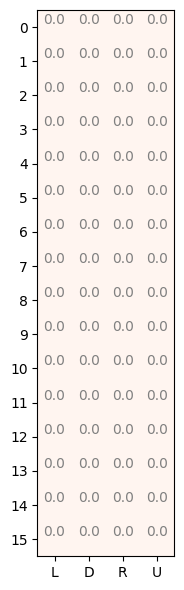

In [79]:
plt.figure(figsize=(16, 6))
plt.imshow(Q, cmap='Reds')
for i in range(nS):
    for j in range(nA):
        q = np.around(Q[i, j], 2)
        plt.text(j, i, q, ha='center', va='bottom', color='gray')
plt.yticks(np.arange(nS), np.arange(nS))
plt.xticks(np.arange(nA), ['L', 'D', 'R', 'U'])
plt.tight_layout()
plt.show()

In [109]:
def select_action(Q, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(nA)
    return np.argmax(Q[s, :])

In [110]:
def mc_estimation(Q, eps):
    Rs = np.zeros((nS, nA))
    Ns = np.zeros((nS, nA)) + 1e-10
    for episode in range(1000):
        s, _ = env.reset()
        buffer = []
        for step in range(20):
            a = select_action(Q, eps)
            s_prime, r, done, _, _ = env.step(a)

            buffer.append((s, a, r))
            Ns[s, a] += 1

            if done:
                break

            s = s_prime
            
        calculate_returns(buffer, Rs)
        Q = Rs / Ns
    return Q

In [111]:
eps = 1.0
Q = np.zeros((nS, nA))
for k in range(20):
    eps = 1 / (k + 1)
    Q = mc_estimation(Q, eps)

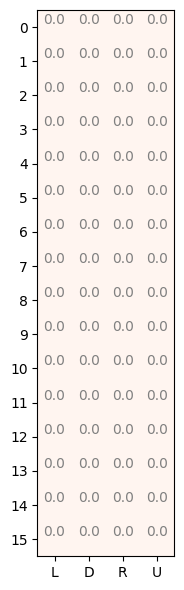

In [112]:
plt.figure(figsize=(16, 6))
plt.imshow(Q, cmap='Reds')
for i in range(nS):
    for j in range(nA):
        q = np.around(Q[i, j], 2)
        plt.text(j, i, q, ha='center', va='bottom', color='gray')
plt.yticks(np.arange(nS), np.arange(nS))
plt.xticks(np.arange(nA), ['L', 'D', 'R', 'U'])
plt.tight_layout()
plt.show()